## Question 1 Part A


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Activation,Flatten,Dense,Reshape,Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CosineSimilarity, MeanSquaredError
from tensorflow.keras.metrics import CosineSimilarity as CS
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 40,
        }
#%%

img_path = r"C:\Users\sagar\OneDrive\Desktop\deep learning\A2\Group_8\train\butterfly\image_0002.jpg"

def prepare_image(img):
    img = cv2.resize(img, (200,300)) #cv2.resize takes breadth x length as resize inputs
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
bfly = prepare_image(plt.imread(img_path))

def normalize(img):
    new = (img - tf.reduce_min(img))/ (tf.reduce_max(img)- tf.reduce_min(img))
    return new

def comparison_plot(img1, img2,index,vmin=0.3,vmax=0.7, mix_val=2):
    f = plt.figure(figsize=(20,50))
    plt.subplot(1,2,1)
    plt.title(f"Reconstructed{index}", fontdict=font)
    plt.imshow(img1, cmap = "gray")
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.title(f"Original{index}", fontdict=font)
    plt.imshow(img2, cmap = "gray")
    plt.axis("off")
    return 0

train_folder_path = r"C:\Users\sagar\OneDrive\Desktop\deep learning\A2\Group_8\train"
test_folder_path = r"C:\Users\sagar\OneDrive\Desktop\deep learning\A2\Group_8\test"

def read_images(path):
    
    output = {}
    os.chdir(path)
    for classes in os.listdir():
        print(classes)
        os.chdir(path+f"\\{classes}")
        images_of_one_class = []
        for img in os.listdir():
            I = plt.imread(img)
            
            try: #skips grayscale conversion for images that are already grayscale
                I = prepare_image(I)
            except:
                I = cv2.resize(I, (200,300))
            
            images_of_one_class.append(I)
        output[classes] = images_of_one_class
        
    return output

train_images = read_images(train_folder_path) 
test_images = read_images(test_folder_path)

#%%

X_train = np.zeros((0,60000))

for i in train_images:
    c = np.array(train_images[i])
    c = c.reshape(-1, 200*300)
    X_train = np.concatenate((X_train, c))

X_test = np.zeros((0,60000))

for i in train_images:
    c = np.array(test_images[i])
    c = c.reshape(-1, 200*300)
    X_test = np.concatenate((X_test, c))

X_train /=255
X_test /=255
"""
autoencoder = Sequential([
    Dense(64, activation = 'relu', input_shape = (200*300,)),
    Dense(200*300, activation = 'linear'),
    ])

opt = Adam(learning_rate=0.001)
autoencoder.compile(optimizer=opt,
              loss = MeanSquaredError(), #because images are of large size, they may be far apart in traditional MSE.
              metrics = CS())
#%%
history = autoencoder.fit(
    X_train, X_train,
    shuffle = True,
    epochs = 40,
    verbose = 1,
)
#%%

what = autoencoder.predict(X_train)
    
for i in range(0,10):

    this = what[i].reshape((300,200))
    comparison_plot(this, X_train[i].reshape((300,200)), index = i)

# this = what[16].reshape((300,200))
# comparison_plot(this, X_train[16].reshape((300,200)))
#%%
what = autoencoder.predict(X_test)
for i in range(0,10):

    this = what[i].reshape((300,200))
    
    comparison_plot(this, X_test[i].reshape((300,200)), index = i)
    


butterfly
crayfish
helicopter
butterfly
crayfish
helicopter


"\nautoencoder = Sequential([\n    Dense(64, activation = 'relu', input_shape = (200*300,)),\n    Dense(200*300, activation = 'linear'),\n    ])\n\nopt = Adam(learning_rate=0.001)\nautoencoder.compile(optimizer=opt,\n              loss = MeanSquaredError(), #because images are of large size, they may be far apart in traditional MSE.\n              metrics = CS())\n#%%\nhistory = autoencoder.fit(\n    X_train, X_train,\n    shuffle = True,\n    epochs = 40,\n    verbose = 1,\n)\n#%%\n\nwhat = autoencoder.predict(X_train)\n    \nfor i in range(0,10):\n\n    this = what[i].reshape((300,200))\n    comparison_plot(this, X_train[i].reshape((300,200)), index = i)\n\n# this = what[16].reshape((300,200))\n# comparison_plot(this, X_train[16].reshape((300,200)))\n#%%\nwhat = autoencoder.predict(X_test)\nfor i in range(0,10):\n\n    this = what[i].reshape((300,200))\n    \n    comparison_plot(this, X_test[i].reshape((300,200)), index = i)\n    \n"

In [2]:
X_test.shape

(60, 60000)

In [3]:
c1 = np.zeros((40))
c2 = np.ones((40))
c3 = c2+1
y_train = np.concatenate((c1,c2,c3))

c1 = np.zeros((20))
c2 = np.ones((20))
c3 = c2+1
y_test = np.concatenate((c1,c2,c3))


## Question 1 Part B,C

In [24]:
'''
Three layer accuracy
'''
def threeLayer(n1, n2): #n1 and n2 are the encoding number of neurons for 3-layer-autoencoder

    autoencoder = Sequential([
        Dense(n1, activation = 'relu', input_shape = (200*300,)),
        Dense(n2, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(256, activation = 'relu'),
        Dense(3, activation = 'softmax')])
    
    opt = Adam(learning_rate=0.001)
    autoencoder.compile(optimizer=opt,
                  loss = 'sparse_categorical_crossentropy', 
                  metrics = ['accuracy'])
    
    history = autoencoder.fit(
        X_train, y_train,
        shuffle = True,
        epochs = 30, #after this loss starts oscillating
        verbose = 1,
    )
    
    what = autoencoder.predict(X_test)
    y_pred = []
    for i in range(len(what)):
        c = np.argmax(what[i])
        y_pred.append(c)
    
    return y_pred


actual1 = threeLayer(1024, 256)
actual2 = threeLayer(256, 32)
actual3 = threeLayer(128, 64)
#%%

print("\n<------- Accuracy Score ------->")

print("1024_256_1024:\n", accuracy_score(y_test, actual1))
print("256_32_256:\n", accuracy_score(y_test, actual2))
print("128_64_128:\n", accuracy_score(y_test, actual3))

print("\n<------- Confusion Matrix ------->")

print("\n1024_256_1024:\n", confusion_matrix(y_test, actual1))
print("\n256_32_256:\n", confusion_matrix(y_test, actual2))
print("\n128_64_128:\n", confusion_matrix(y_test, actual3))



#%%
'''
one layer accuracy
'''

def oneLayer(n1,X_train=X_train): #n1 is the the encoding number of neurons for 1-layer-autoencoder

    autoencoder = Sequential([
        Dense(n1, activation = 'relu', input_shape = (200*300,)),
        Dense(128, activation = 'relu'),
        Dense(256, activation = 'relu'),
        Dense(3, activation = 'softmax')])
    
    opt = Adam(learning_rate=0.001)
    autoencoder.compile(optimizer=opt,
                  loss = 'sparse_categorical_crossentropy', 
                  metrics = ['accuracy'])
    
    history = autoencoder.fit(
        X_train, y_train,
        shuffle = True,
        epochs = 40,
        verbose = 1,
    )
    
    what = autoencoder.predict(X_test)
    y_pred = []
    for i in range(len(what)):
        c = np.argmax(what[i])
        y_pred.append(c)
        
    fig = plt.figure(figsize=(10,10))  
    maximal_weights =  np.array(autoencoder.weights[0])
    for i in range(2700):
        maximal_weights[:,0] /= np.linalg.norm(maximal_weights[:,0])
    for i in range(1,64):
        fig.add_subplot(8, 8, i)
        plt.imshow(maximal_weights[:,i-1].reshape(300,200),cmap='gray')
        plt.axis('off')
    
    return y_pred
#%%

actual1 = oneLayer(64)
actual2 = oneLayer(128)
actual3 = oneLayer(2700)


print("64:\n", accuracy_score(y_test, actual1))
print("128:\n", accuracy_score(y_test, actual2))
print("2700:\n", accuracy_score(y_test, actual3))

print("\n<------- Confusion Matrix ------->")

print("\n 64:\n", confusion_matrix(y_test, actual1))
print("\n 128:\n", confusion_matrix(y_test, actual2))
print("\n 2700:\n", confusion_matrix(y_test, actual3))



'\nactual1 = oneLayer(64)\nactual2 = oneLayer(128)\nactual3 = oneLayer(2700)\n\n\nprint("64:\n", accuracy_score(y_test, actual1))\nprint("128:\n", accuracy_score(y_test, actual2))\nprint("2700:\n", accuracy_score(y_test, actual3))\n\nprint("\n<------- Confusion Matrix ------->")\n\nprint("\n 64:\n", confusion_matrix(y_test, actual1))\nprint("\n 128:\n", confusion_matrix(y_test, actual2))\nprint("\n 2700:\n", confusion_matrix(y_test, actual3))\n\n'

## For 3 layer Autoencoders
| Neurons         | Accuracy Score|
| -------------   |:-------------:|
| 1024_256_1024   | 65%           | 
| 256_32_256      | 65%           |
| 128_64_128      | 60%           |


<p></p>

<center><h4>Confusion Matrix </h4></center>
<p></p>
<center>1024_256_1024</center>

 | - | - | - |
| --------------- | --------------- | --------------- |
| 14 | 4| 2 |
| 3 | 11 | 6 |
| 0| 6| 14 |

<p></p>
<center>256_32_256</center>

 | - | - | - |
| --------------- | --------------- | --------------- |
| 12 | 7| 1 |
| 3 | 12 | 5 |
| 1| 4| 15 |

<p></p>
<center>128_64_128</center>

 | - | - | - |
| --------------- | --------------- | --------------- |
| 18 | 2| 0 |
| 12 | 7 | 1 |
| 8| 1| 11 |

## For 1 layer Autoencoders
| Neurons         | Accuracy Score|
| -------------   |:-------------:|
| 64   | 56.66%           | 
| 128      | 65%           |
| 2700      | 71.67%           |


<p></p>

<center><h4>Confusion Matrix </h4></center>
<p></p>
<center>64</center>

 | - | - | - |
| --------------- | --------------- | --------------- |
| 10 | 3| 7 |
| 3 | 4 | 13 |
| 0| 0| 20 |

<p></p>
<center>128</center>

 | - | - | - |
| --------------- | --------------- | --------------- |
| 15 | 5|0 |
| 5 | 14 | 1 |
| 1| 9| 10 |

<p></p>
<center>2700</center>

 | - | - | - |
| --------------- | --------------- | --------------- |
| 16 | 3| 1 |
| 6 | 10 | 4 |
| 1| 2| 17 |



In [ ]:
#### import random
def noise(array,factor):
    """
    Adds random noise to each image in the supplied array.

    """
    N = np.zeros((60000))
    for i in range(int(factor*60000)):
        temp = random.randint(0,60000-1)
        N[temp] += np.random.normal(loc=0.5, scale=0.5, size = 1)
    
    trainXNoisy = np.clip(array + N, 0, 1)

    return trainXNoisy

def comparison_plot(img1, img2,index,vmin=0.3,vmax=0.7, mix_val=2):
    f = plt.figure(figsize=(20,50))
    plt.subplot(1,2,1)
    plt.title(f"Added Noise{index}", fontdict=font)
    plt.imshow(img1, cmap = "gray")
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.title(f"Original{index}", fontdict=font)
    plt.imshow(img2, cmap = "gray")
    plt.axis("off")
    return 0

X_train_noisy_20 = np.array([noise(i,0.2) for i in X_train])
X_train_noisy_40 = np.array([noise(i,0.4) for i in X_train])
print(X_train_noisy_20.shape)

comparison_plot(noise(X_train[7],0.2).reshape(300,200), X_train[7].reshape(300,200),0)
comparison_plot(noise(X_train[56],0.2).reshape(300,200), X_train[56].reshape(300,200),0)
comparison_plot(noise(X_train[116],0.2).reshape(300,200), X_train[116].reshape(300,200),0)


comparison_plot(noise(X_train[7],0.4).reshape(300,200), X_train[7].reshape(300,200),0)
comparison_plot(noise(X_train[56],0.4).reshape(300,200), X_train[56].reshape(300,200),0)
comparison_plot(noise(X_train[116],0.4).reshape(300,200), X_train[116].reshape(300,200),0)


In [6]:

def comparison_plot(img1, img2,index,vmin=0.3,vmax=0.7, mix_val=2):
    f = plt.figure(figsize=(20,50))
    plt.subplot(1,2,1)
    plt.title(f"Reconstructed{index}", fontdict=font)
    plt.imshow(img1, cmap = "gray")
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.title(f"Original{index}", fontdict=font)
    plt.imshow(img2, cmap = "gray")
    plt.axis("off")
    return 0

## Question 2 Part A


4/4 [==============================] - 15s 2s/step - loss: -0.8928 - cosine_similarity: 0.8928


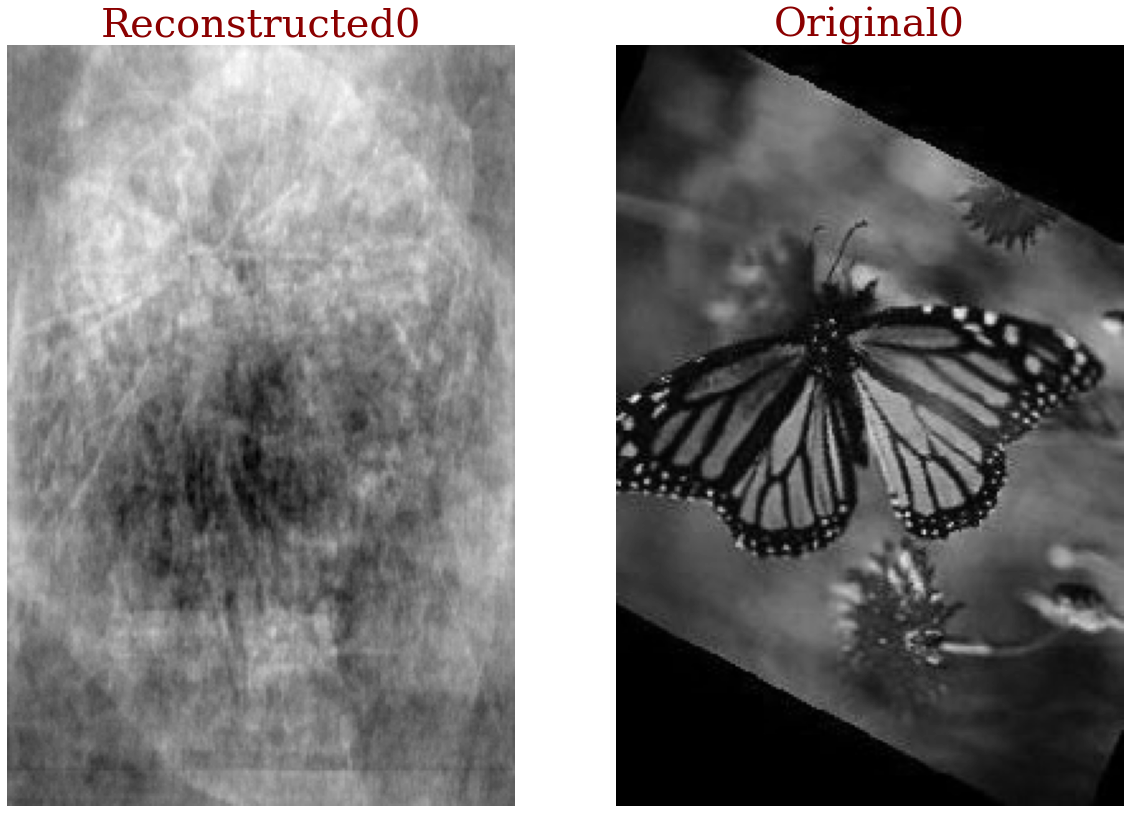

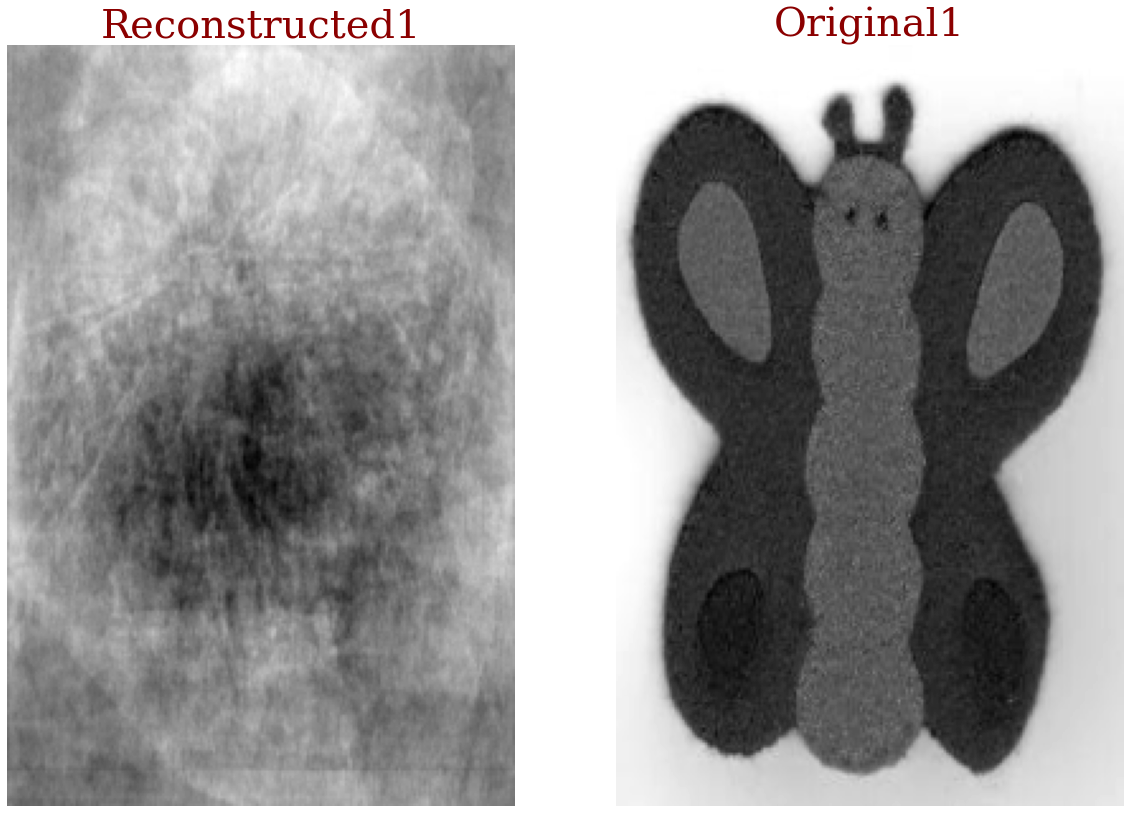

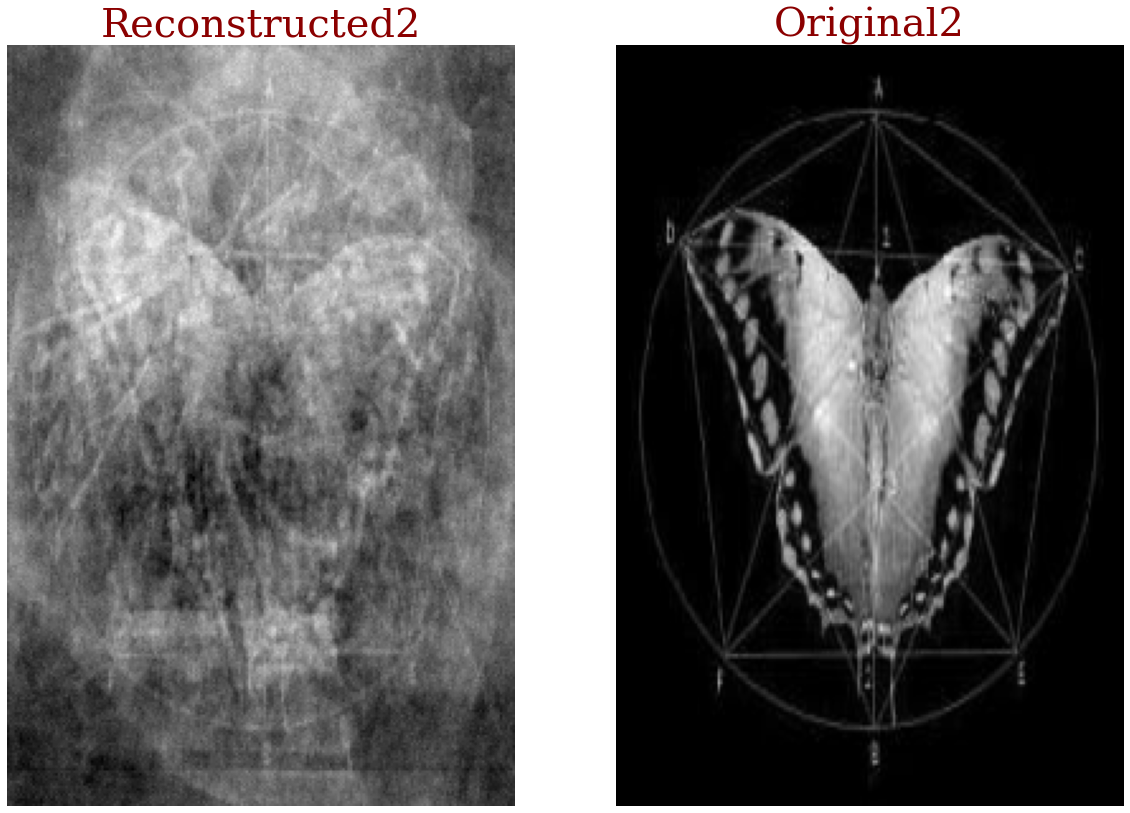

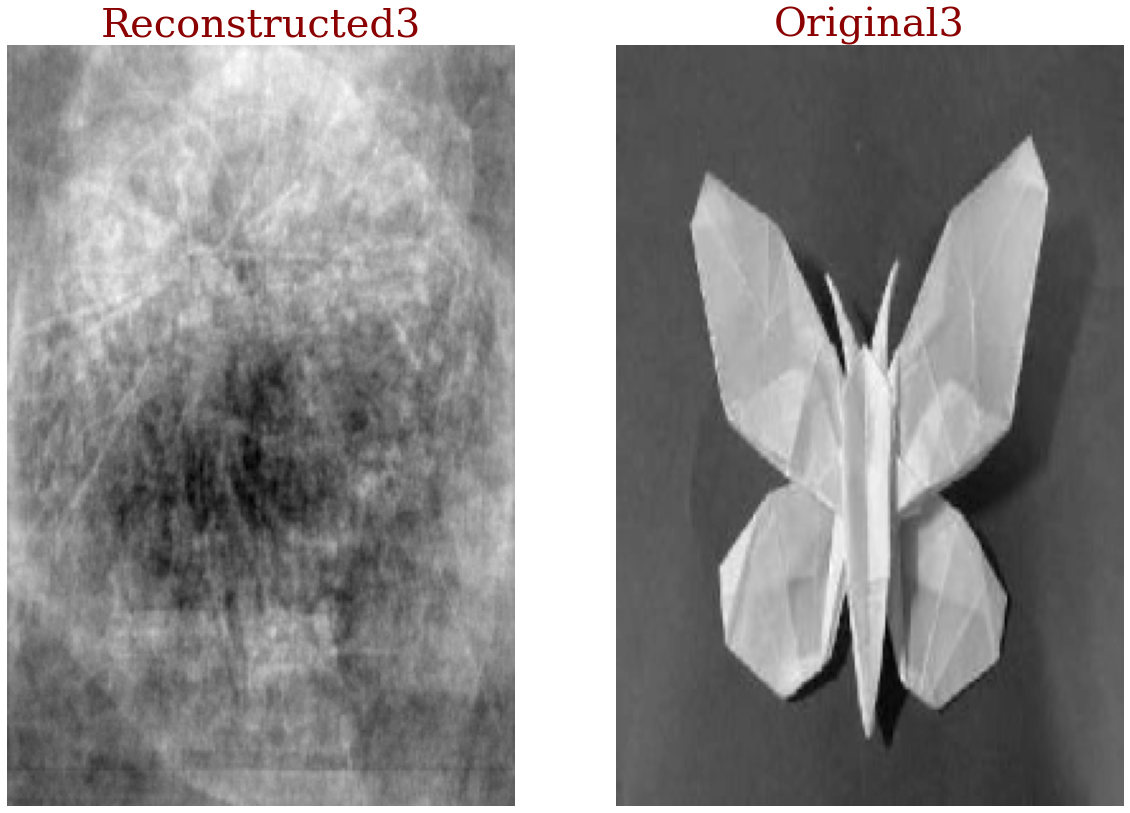

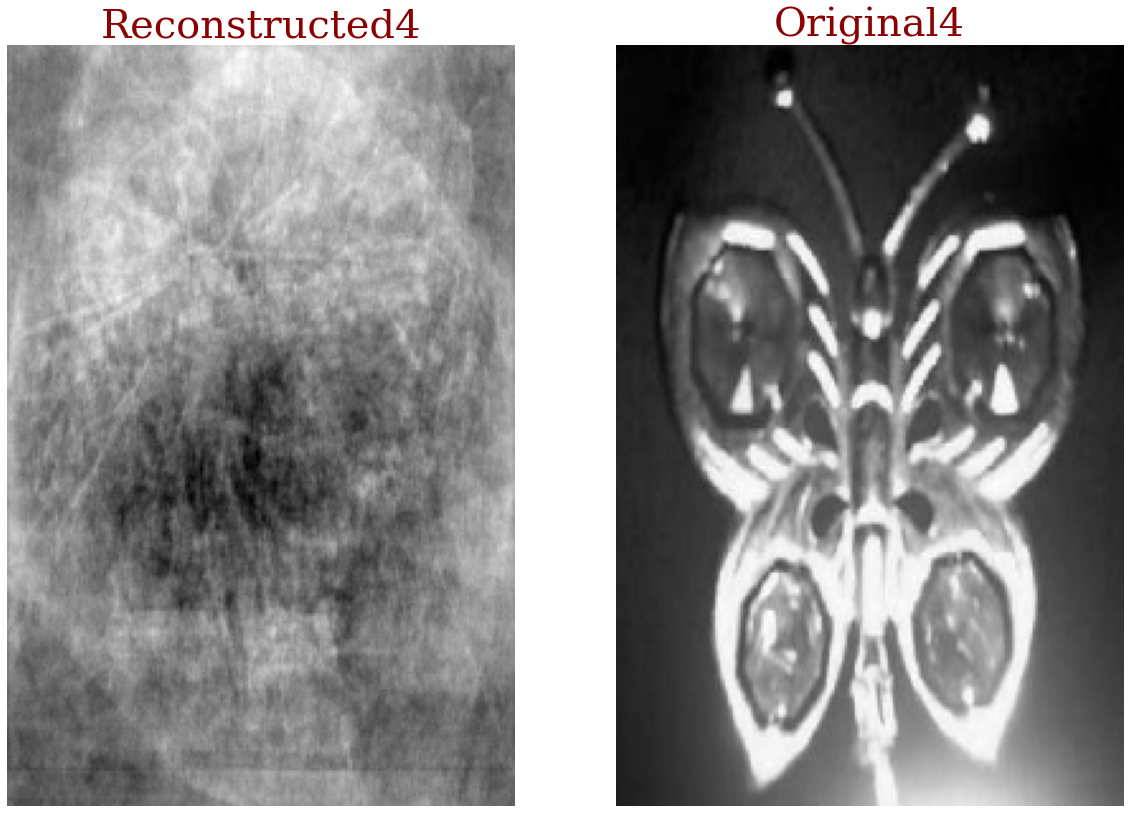

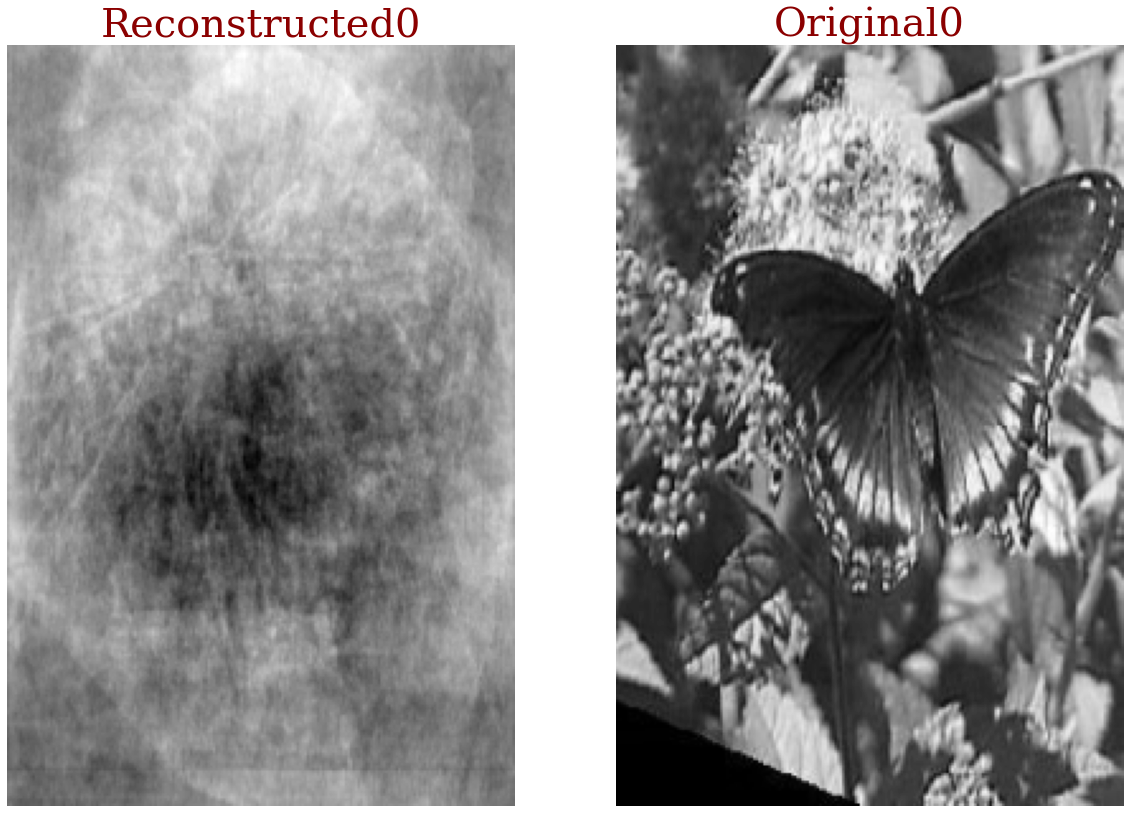

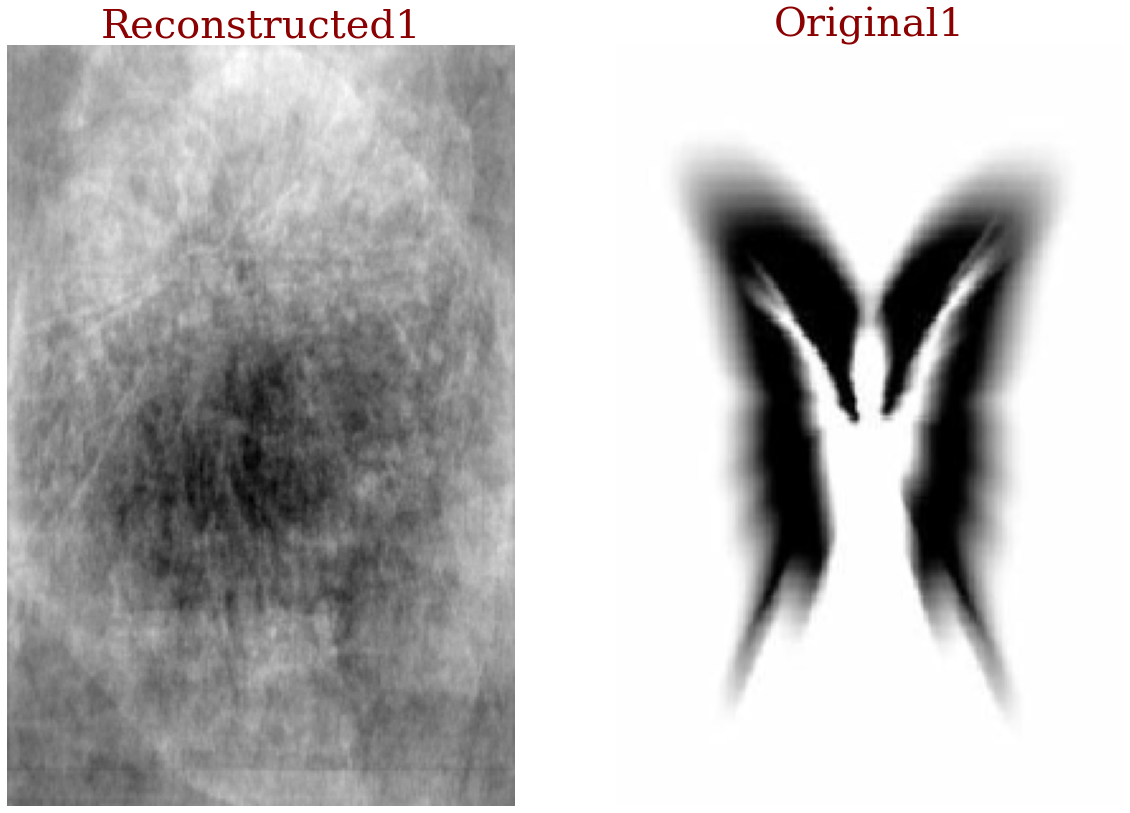

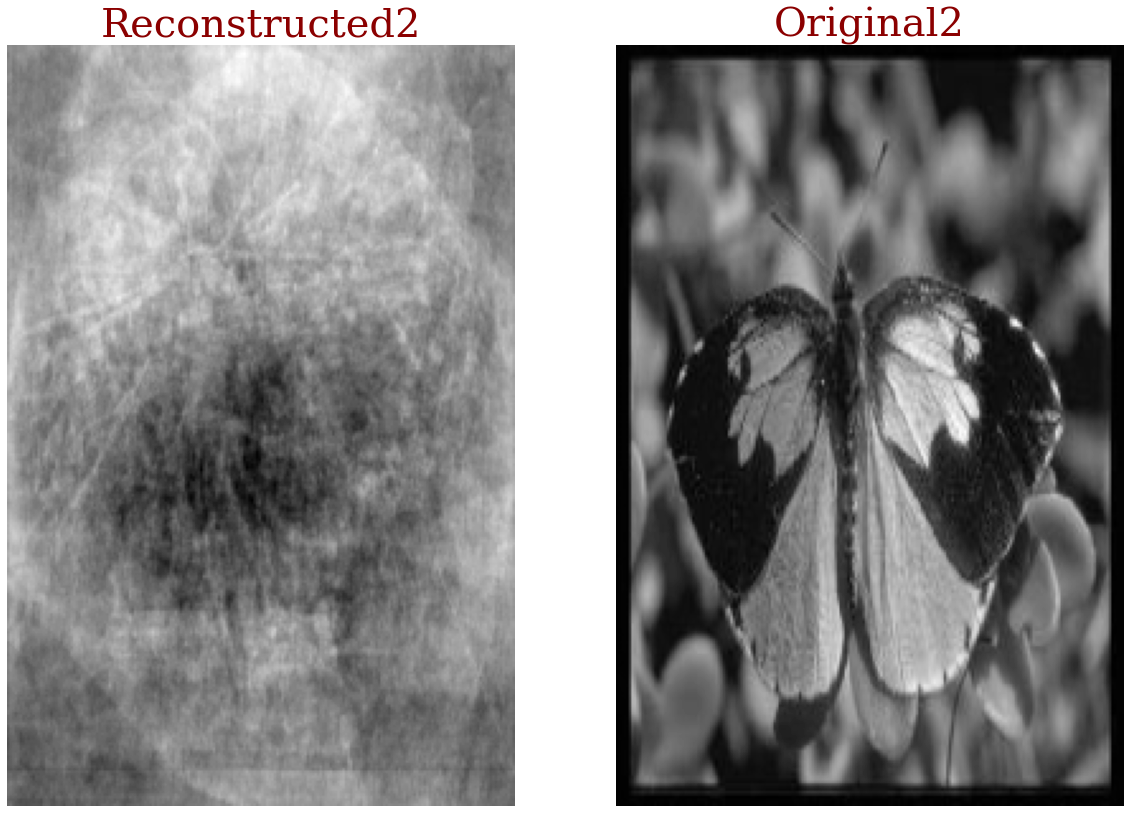

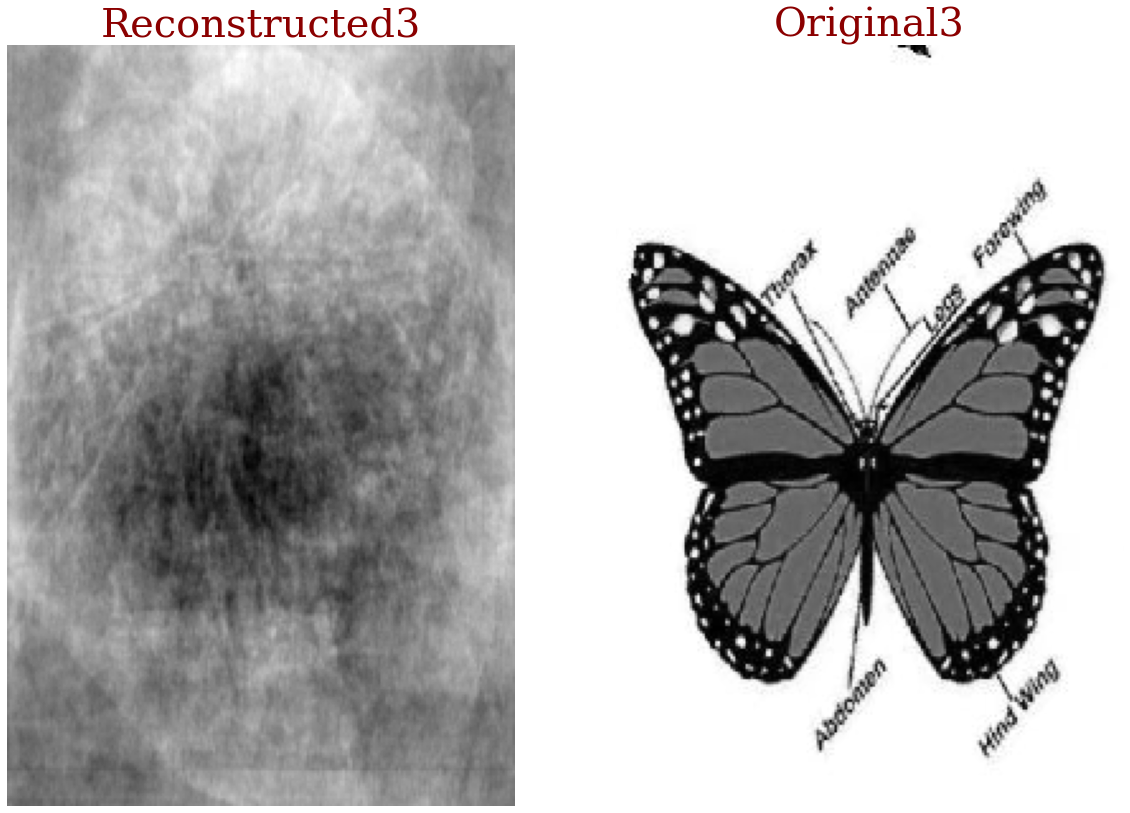

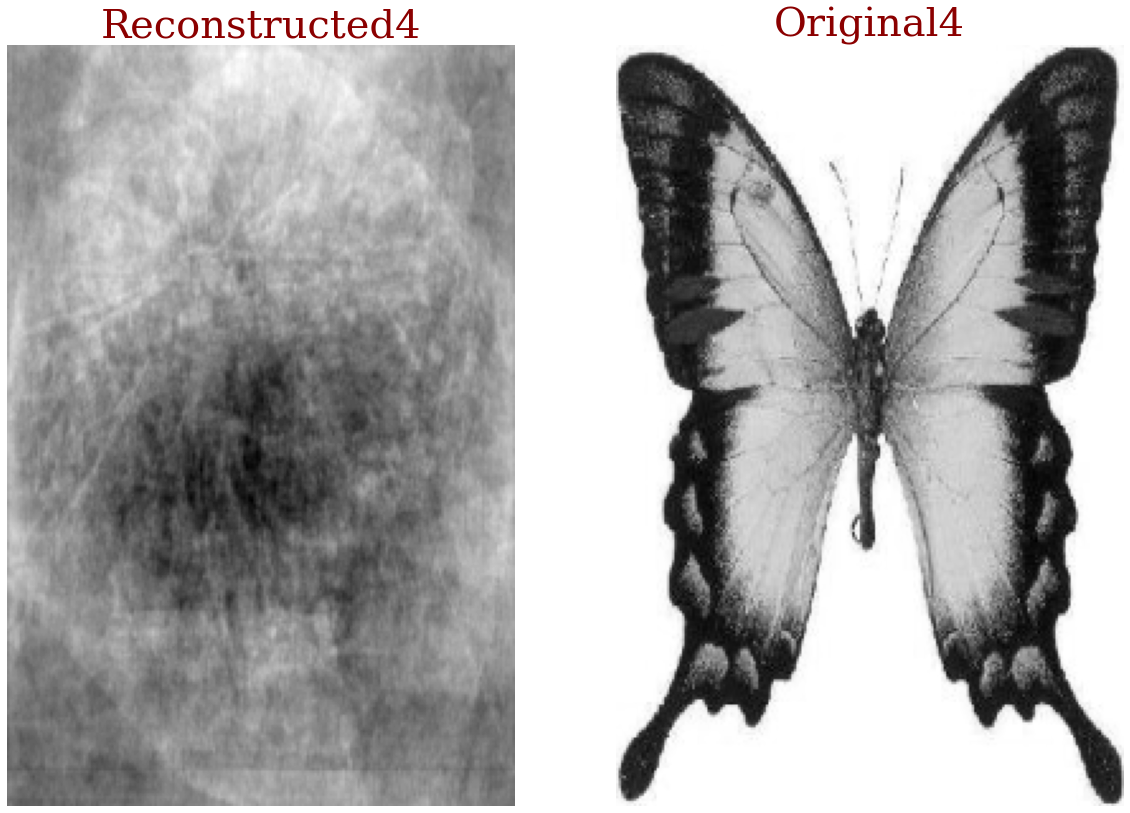

In [7]:

autoencoder = Sequential([
    Dense(2700, activation = 'relu', input_shape = (200*300,)),
    Dense(200*300, activation = 'linear')])

opt = Adam(learning_rate=0.001)
autoencoder.compile(optimizer=opt,
              loss = CosineSimilarity(), #because images are of large size, they may be far apart in traditional MSE.
              metrics = CS())
#%%
W = []
data = np.array([noise(j,0.2) for j in X_train])

history = autoencoder.fit(
    X_train_noisy_40, X_train,
    shuffle = True,
    epochs = 1,
    verbose = 1,
)
W.append(autoencoder.get_weights())
#%%
for i in range(20):
    data = np.array([noise(j,0.2) for j in X_train])
    
    autoencoder.set_weights(W[0])
    W.pop(0)
    history = autoencoder.fit(
        X_train_noisy_40, X_train,
        shuffle = True,
        epochs = 1,
        verbose = 1,
    )
    W.append(autoencoder.get_weights())
    
    
##
what = autoencoder.predict(X_train)
    
for i in range(0,5):

    this = what[i].reshape((300,200))
    comparison_plot(this, X_train[i].reshape((300,200)), index = i)

# this = what[16].reshape((300,200))
# comparison_plot(this, X_train[16].reshape((300,200)))
#%%
what = autoencoder.predict(X_test)
for i in range(0,5):

    this = what[i].reshape((300,200))
    comparison_plot(this, X_test[i].reshape((300,200)), index = i)


In [8]:
#Adding noise to the training dataset



Epoch 1/40
4/4 [==============================] - 4s 785ms/step - loss: 81.1652 - accuracy: 0.3083
Epoch 2/40
4/4 [==============================] - 3s 766ms/step - loss: 44.0770 - accuracy: 0.3917
Epoch 3/40
4/4 [==============================] - 3s 792ms/step - loss: 44.3984 - accuracy: 0.2833
Epoch 4/40
4/4 [==============================] - 3s 765ms/step - loss: 47.6455 - accuracy: 0.3250
Epoch 5/40
4/4 [==============================] - 3s 787ms/step - loss: 7.9758 - accuracy: 0.3667
Epoch 6/40
4/4 [==============================] - 3s 755ms/step - loss: 8.0709 - accuracy: 0.3917
Epoch 7/40
4/4 [==============================] - 3s 751ms/step - loss: 10.4529 - accuracy: 0.3583
Epoch 8/40
4/4 [==============================] - 3s 792ms/step - loss: 9.3243 - accuracy: 0.4250
Epoch 9/40
4/4 [==============================] - 3s 782ms/step - loss: 8.5373 - accuracy: 0.3500
Epoch 10/40
4/4 [==============================] - 3s 808ms/step - loss: 2.6499 - accuracy: 0.5250
Epoch 11/40
4/

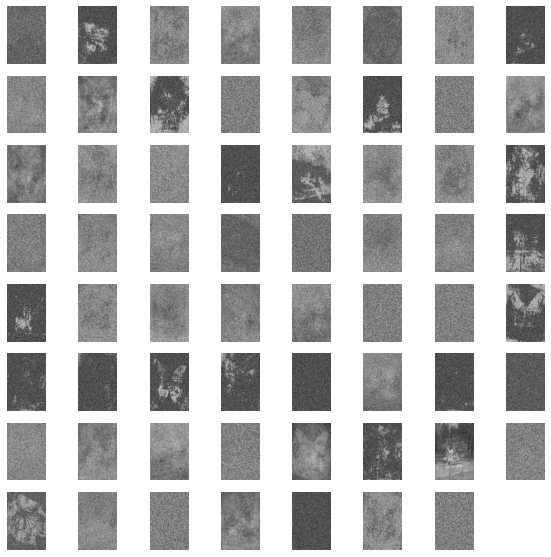

In [25]:

actualnoise = oneLayer(2700,X_train_noisy_20)
print("2700:", accuracy_score(y_test, actualnoise))
print("\n 2700:\n", confusion_matrix(y_test, actualnoise))


Epoch 1/40
4/4 [==============================] - 4s 836ms/step - loss: 72.4410 - accuracy: 0.4167
Epoch 2/40
4/4 [==============================] - 3s 866ms/step - loss: 65.7057 - accuracy: 0.3333
Epoch 3/40
4/4 [==============================] - 3s 767ms/step - loss: 44.0901 - accuracy: 0.3250
Epoch 4/40
4/4 [==============================] - 3s 777ms/step - loss: 19.4475 - accuracy: 0.3917
Epoch 5/40
4/4 [==============================] - 3s 787ms/step - loss: 17.0743 - accuracy: 0.3583
Epoch 6/40
4/4 [==============================] - 4s 907ms/step - loss: 12.8424 - accuracy: 0.4333
Epoch 7/40
4/4 [==============================] - 4s 835ms/step - loss: 14.3786 - accuracy: 0.2833
Epoch 8/40
4/4 [==============================] - 3s 811ms/step - loss: 11.9773 - accuracy: 0.3083
Epoch 9/40
4/4 [==============================] - 3s 829ms/step - loss: 18.1978 - accuracy: 0.3583
Epoch 10/40
4/4 [==============================] - 4s 860ms/step - loss: 8.6757 - accuracy: 0.3167
Epoch 11/4

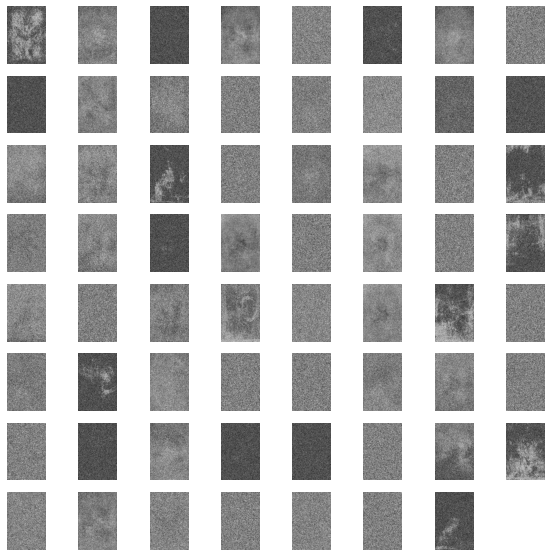

In [26]:

actualnoise = oneLayer(2700,X_train_noisy_40)
print("2700:", accuracy_score(y_test, actualnoise))
print("\n 2700:\n", confusion_matrix(y_test, actualnoise))


## For 20% Noise
| Neurons         | Accuracy Score|
| --------------- | --------------- |
| 2700      | 63.33%           |


<p></p>

<center><h4>Confusion Matrix </h4></center>
<p></p>
<center>2700</center>

 | - | - | - |
| --------------- | --------------- | --------------- |
| 9 | 10| 1 |
| 2 | 17 | 1 |
| 0| 8| 12 |

## For 40% Noise
| Neurons         | Accuracy Score|
| --------------- | --------------- |
| 2700      | 53.33%           |


<p></p>

<center><h4>Confusion Matrix </h4></center>
<p></p>
<center>2700</center>

 | - | - | - |
| --------------- | --------------- | --------------- |
| 8 | 0| 12 |
| 3 | 4 | 13 |
| 0| 0| 20 |


In [ ]:
#Implementation of noise addtion in part B and C is incomplete owing to hardware limitations.